## SPARC-4 mini-pipeline tools
# Half-wave polarimetry

This notebook shows an example for obtaining a polarimetric analysis of a set of observations using the SPARC4 instrument in polarimetric mode with a half-wave rotating plate. It takes as input a series of science imaging products obtained with the SPARC4 pipeline.

* Eder Martioli, LNA 10 Jun 2023

In [5]:
import os, sys
path_parent = os.path.dirname(os.getcwd())
# path_parent = "/Volumes/Samsung_T5/sparc4-pipeline/"
sys.path.append(path_parent) 

import glob

import sparc4_pipeline_lib as s4pipelib
import sparc4_utils as s4utils
import sparc4_params
import sparc4_product_plots as s4plt

## User inputs

In [10]:
# set an object ID matching the ID in the image header keyword 'OBJECT'
OBJECTID = "HD111579"
OBJECT_SUFFIX = "hd111"

# set night directory name
NIGHTDIR = '20230503'
# set raw data root directory
DATADIR =  "/Volumes/Samsung_T5/Data/SPARC4/minidata/"
# set reduced data root directory
REDUCEDDIR = "/Volumes/Samsung_T5/Data/SPARC4/minidata/reduced/"

# set SPARC4 channel
CHANNEL = 1  # 1, 2, 3 or 4

# whether or not to force reduction even if product already exists
FORCE = True

# initialize SPARC4 pipeline parameters
p = sparc4_params.init_s4_p(datadir=DATADIR,
                            reducedir=REDUCEDDIR,
                            nightdir=NIGHTDIR,
                            channels="{}".format(CHANNEL),
                            print_report=False)

# Calculate `HALF-WAVE` POLARIMETRY

In [11]:
# set wild card to identify polarimetric sequence
l2seq_wild_card = "_{}_proc.fits".format(OBJECT_SUFFIX)

# produce list of reduced polarimetry frames in the sequence
l2seq = glob.glob("{}/*{}".format(p['reduce_directories'][CHANNEL-1], l2seq_wild_card))

# compute polarimetry and save it into a .FITS polarimetry product
polarL2product = s4pipelib.compute_polarimetry(l2seq, 
                                               wave_plate='halfwave', 
                                               compute_k=True, 
                                               force=FORCE)

Number of sources in catalog: 2
Number of apertures: 49  varying from 2.0 to 50.0 in steps of 1.0 pix
Calculating halfwave polarimetry for source 1 of 2
Calculating halfwave polarimetry for source 2 of 2
Saving output halfwave polarimetry product: /Volumes/Samsung_T5/Data/SPARC4/minidata/reduced//sparc4acs1//20230503/20230503_s4c1_001509_hd111_l2_polar.fits


# Check POLARIMETRY results

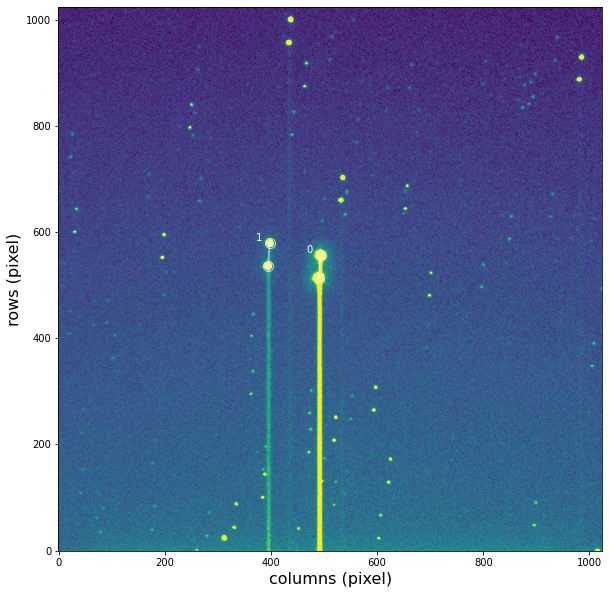

In [12]:
# First, check your target index in the stack image:
stack_img = "{}/{}_s4c{}_{}_POL_L2_stack.fits".format(p['reduce_directories'][CHANNEL-1],NIGHTDIR,CHANNEL,OBJECTID.replace(" ",""))

# plot polar stack img
s4plt.plot_sci_polar_frame(stack_img, percentile=99.5)

Source index: i=0 
Source RA=100.5329912672059 Dec=-23.73094862374275 mag=-13.7205+-0.0004
Best aperture radius: 10 pixels
Polarization in Q: 0.0377+-0.0003
Polarization in U: -0.0497+-0.0003
Polarization in V: nan+-nan
Total linear polarization p: 0.0624+-0.0003
Angle of polarization theta: 153.6+-0.1
Free constant k: 1.041543727265169+-nan
Zero of polarization: 0.0+-0.0
RMS of zi residuals: 0.00083
Reduced chi-square (n=16, DOF=12): 0.50


/Users/eder/anaconda3/lib/python3.7/site-packages/astropop/math/physical.py:100: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1


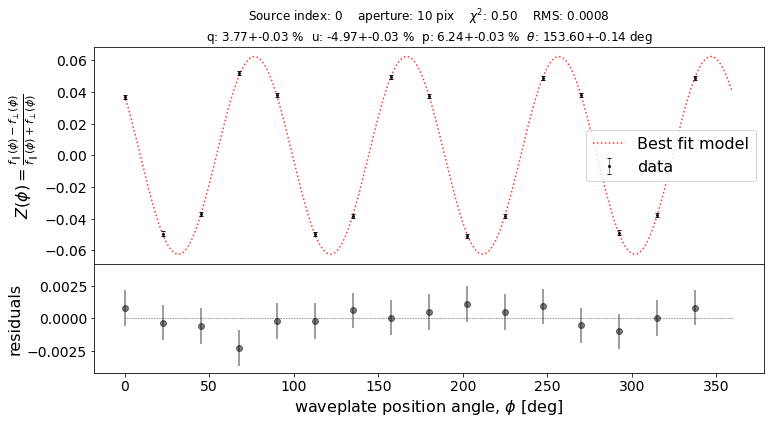

In [13]:
# set target index (check the number next to your star in the stack image above)
target_index = 0

# read polarimetry results for a selected target index
pol_results = s4pipelib.get_polarimetry_results(polarL2product,
                                                source_index=target_index,
                                                min_aperture=p['MIN_APERTURE_FOR_POLARIMETRY'],
                                                max_aperture=p['MAX_APERTURE_FOR_POLARIMETRY'],
                                                plot=True,
                                                verbose=True)

In [14]:
# print polarimetry results
print(pol_results)

{'POLAR_PRODUCT': '/Volumes/Samsung_T5/Data/SPARC4/minidata/reduced//sparc4acs1//20230503/20230503_s4c1_001509_hd111_l2_polar.fits', 'SOURCE_INDEX': 0, 'APERTURE_INDEX': 8, 'APERTURE_RADIUS': 10, 'NEXPS': 16, 'WAVEPLATE_ANGLES': array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ,
       202.5, 225. , 247.5, 270. , 292.5, 315. , 337.5]), 'ZI': <QFloat at 0x7f8d18aa9e48>
[0.037+-0.001, -0.049+-0.001, -0.037+-0.001, 0.052+-0.001, 0.038+-0.001,
 -0.050+-0.001, -0.038+-0.001, 0.050+-0.001, 0.037+-0.001, -0.051+-0.001,
 -0.038+-0.001, 0.049+-0.001, 0.038+-0.001, -0.049+-0.001, -0.038+-0.001,
 0.049+-0.001], 'OBSERVED_MODEL': array([ 0.03773551, -0.0497268 , -0.03773551,  0.0497268 ,  0.03773551,
       -0.0497268 , -0.03773551,  0.0497268 ,  0.03773551, -0.0497268 ,
       -0.03773551,  0.0497268 ,  0.03773551, -0.0497268 , -0.03773551,
        0.0497268 ]), 'Q': <QFloat at 0x7f8d178aef60>
0.0377+-0.0003, 'U': <QFloat at 0x7f8d18aa9b38>
-0.0497+-0.0003, 'V': <QFloat at 0x7f

/Users/eder/anaconda3/lib/python3.7/site-packages/astropop/math/physical.py:100: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
